# K-means & PCA

We saw how Principal Component Analysis (PCA) can be used as a tool for simplifying a high dimensional dataset by properly reducing its features dimensions. 

Another tool for simplifying data is the K-means algorithm. The problem here is not necessarily that the data lives in high dimension, but that there is too much data to process. 

These algorithms are designed to help us either to __simplify process__ or __understand the structure of our data__.

In this first exercice, you will:
 - __Apply K-means__ in a 2D dataset to help gain an intuition of how the algorithm works.
 - __Apply K-means__ for image compression by reducing the number of colours that occur in an image to only those that are most common in that image.
 
 
 In the next one, you will:
 - __Apply PCA__ in a 2D dataset to get intuition on how PCA works, and then to a bigger dataset of face images.

## 1. Generate & Plot Data

[`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) is an `sklearn` method that uses a Gaussian equation to generate separable datasets for clustering or classification.

Use it to generate data (X, y) with the following parameters:
- 500 data points
- 5 classes (or clusters)
- `random_ state`=5

In [2]:
# The usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.preprocessing import RobustScaler




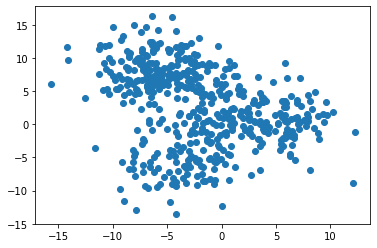

In [54]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=3, random_state=5)
plt.scatter(X[:, 0], X[:, 1]);

<details>
  <summary>Hint</summary>
    
```markdown
- Import libraries
- Then generate data
```
    
</details>
​
<details>
  <summary>View solution</summary>
    
```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

%matplotlib inline

random_state=5

# Generate data.

X, y = make_blobs(n_samples=500, centers=5, random_state=random_state)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.show()
```
</details>



You can also plot what your data looks like (it should be 4 distinct clusters of data).

To summarize, 

1) You've created a fake dataset X, and do not consider the target at all (no supervision with a `y` vector. If you created it, you do not need it in this problem !).\
2) This dataset has 500 observations, and 2 dimensions (or features), which are represented as two-dimensional positions on the plot you just made.\
3) This dataset still has a structure, which is 4 clusters in our case with different centers (or `centroids`)

While fake here, you can find this kind of structure in real life (clients represented by their characteristics can belong to implicit segments etc). We will have a closer look to this latter problem during the livecode (groups of customers for airline companies).

## 2. Apply K-means

Your goal is to find automatically the clusters that give you the inherent structure of your data. Those clusters are just represented by their center.

What you have to determine though, is the __number of clusters__ that you think the data has (domain-knowledge determination of $K$).

[`sklearn` has a `KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) package that does the math for you. 

Import `KMeans` from `sklearn` and initiate a model with the follwing parameters:
- n_clusters=2,
- random_state=5

Then, fit the created data to the model, using `fit_predict`, which both fits the Kmeans model AND predicts back on the observations. It hence returns an array of cluster index assignment.

In [15]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=5)
y_pred = model.fit_predict(X)

<details>
  <summary>View solution</summary>

```python
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
```


</details>

You can now plot the prediction of clusters that KMeans gives you. In order to have a better overview of what the KMeans has found as clusters (here only 2), we want to color every observation with a distinct color corresponing to a cluster. 

In order to do that, just plot your scattered observations, and pass the prediction vector that you just got as the color of the observation using `c=pred` argument

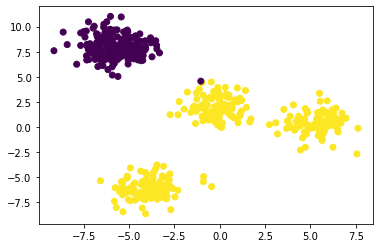

In [16]:
# Your code here
plt.scatter(X[:, 0], X[:, 1], c=y_pred);

In [12]:
model.inertia_

9056.844908975238

<details>
  <summary>View solution</summary>

```python
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Clusters")
plt.show()
```

</details>


As you can see, the KMeans has found 2 clusters has required. It's not the modeling we want. We want to find the optimal number of clusters that represents our data the best. How do we find that optimal number of clusters?

## 3. Find the Appropriate Number of Clusters

We can use two techniques to find the appropriate number of clusters. 

You have to know that the Kmeans also returns a property named `inertia_` that returns the sum of squared distances of samples to their closest cluster center. So it's a good starting point to determine how much we "explained" the data by the found clusters. 

### The Elbow Method

This is a technique that is used to help us find the appropriate number of cluster in K-Means. 

This method looks at the percentage of variance explained as a function of the number of clusters: one should choose a number of clusters so that __adding another cluster doesn't give much better modeling of the data__ 

More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but __at some point the marginal gain will drop, giving an angle in the graph__. 

The number of clusters is chosen at this point, hence the "elbow criterion". 

NB: This "elbow" cannot always be unambiguously identified.

__To do that, you want to `fit` a KMeans for every number of cluster between 1 and 10, and save the explained variance__

In [57]:
# Your code here
results_k_inertia=[]
for k in range (1,10):
    model = KMeans(n_clusters=k, random_state=5)
    y_elbow = model.fit(X)
    results_k_inertia.append([k, model.inertia_])
print('[k, inertia]')
results_k_inertia


[k, inertia]


[[1, 31549.98186551425],
 [2, 15279.650555087399],
 [3, 8883.316481138052],
 [4, 7080.697645239055],
 [5, 5858.662115850542],
 [6, 5148.422415471809],
 [7, 4437.353841948506],
 [8, 3866.0242168574514],
 [9, 3504.1988802236174]]

<details>
  <summary>Hint</summary>

Remember what we did in livecode yesterday for the polynomial degrees ! Here we want to loop over the number of clusters, and store a value in a list (initially empty)
</details>
<details>
  <summary>View solution</summary>

```python
# Apply the elbow method to find the optimal number of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
```

</details>

Then, you want to plot the inertias as a function of the number of clusters.

In [45]:
results_k_inertia

[[1, 23774.691649123888],
 [2, 9056.844908975238],
 [3, 2647.423836900303],
 [4, 1019.8819948201078],
 [5, 867.957000101951],
 [6, 767.9747550462096],
 [7, 697.5684925199599],
 [8, 617.5735486855119],
 [9, 559.8492520539537]]

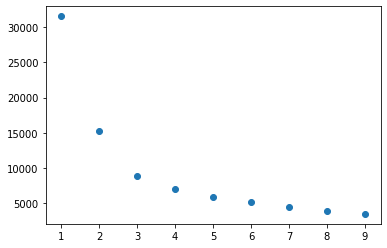

In [58]:
# Your code here
results_k_inertia_array=np.array(results_k_inertia)
plt.scatter(results_k_inertia_array[:,0], results_k_inertia_array[:,1])

<details>
  <summary>Hint</summary>

The `plot` method (matplotlib) take 2 two list of coordinates: the x-coordinates and the y-coordinates. Please add axes labels and title as well.
</details>
<details>
  <summary>View solution</summary>

```python
plt.plot(range(1, 11), wcss)
plt.text(4, 1500, r'K=4, Elbow point')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('(Within-Cluster Sums of Squares')
plt.show()
```
</details>

You should see an "elbow" where the inertia drops dramatically at 4 (since we generated that data, we know it's the right answer).

### (Optional) Hierarchical Clustering

From the previous Elbow Method we can say that the optimal clusters are 4. This can also be confirmed by another statistical technique called [Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering).

Try to plot the dendogram linkage of the hierarchical clustering, that minimizes the within-cluster variance with the 'ward' method. You should get 4 clusters as well

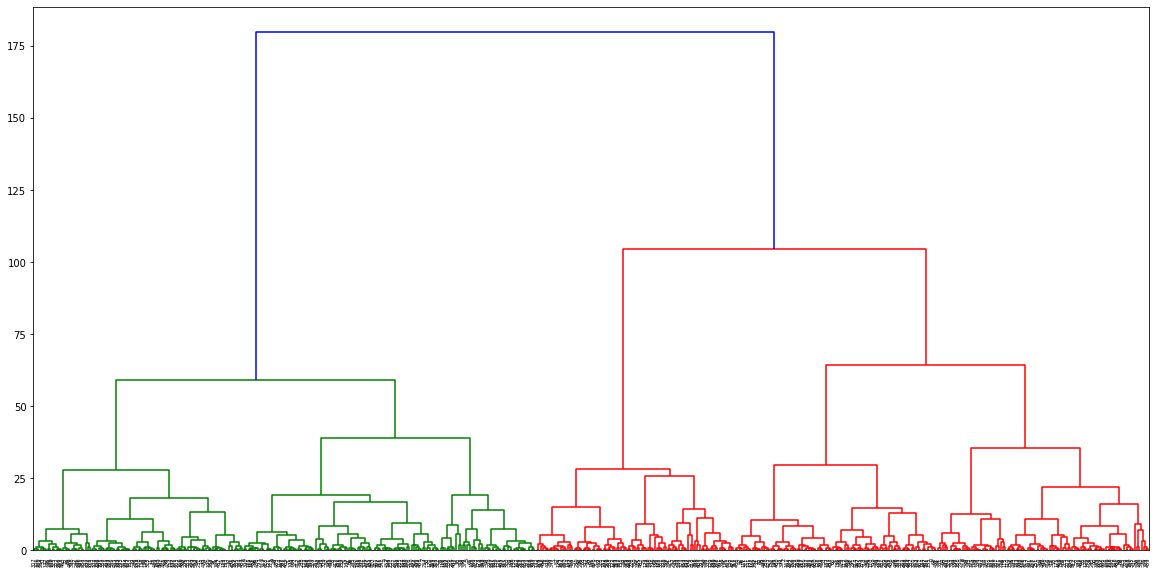

In [59]:
# Your code here
from scipy.cluster import hierarchy as hier

plt.figure(figsize=(20, 10))
dendrogram = hier.dendrogram(hier.linkage(X, method = 'ward')) 


<details>
  <summary>View solution</summary>

```python
# Use a dendrogram to find the optimal number of clusters.
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # 'Ward' minimizes the within-cluster variance.
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()
```
</details>

## 4. Fit K-Means with 4 Optimal Clusters

Now that we have found the optimal number of clusters, we can go on and execute a last `fit_predict` over our observations, and color every cluster with a different color to look at our performance.

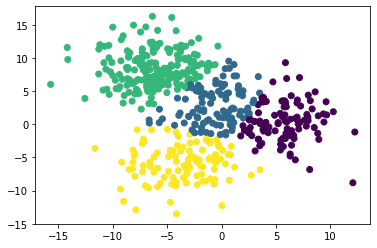

In [65]:
# Your code here
model_final = KMeans(n_clusters=4, random_state=5)
y_pred = model_final.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred);


<details>
  <summary>View solution</summary>

```python

# Correct number of clusters
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Correct Number of Clusters")
plt.show()
```
</details>

**Additional Note:** Does feature scaling always improve the clustering results? 

[Additional learning](https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering)

## 5. Dimensionality reduction with K-means

Let's move on to a more difficult problem. 

In the previous category we have seen the following setting : 4 clusters (or categories / classes / output / target), 500 observations (or samples) of two dimensions (x position and y position).

Now we're gonna apply KMeans but to a different problem : an image is gonna be our dataset - every observation is a pixel of 3 components (red, green, blue). So this time, we're considering every pixel as a sample (usually it's a feature).

So the size of our dataset will be the number of pixels, the dimension will be 3 (the color for each pixel). 

You can execute the code below to create an image dataset - you will need to install the `sklearn-image` to get the skimage library which has a bunch of utilities to manipulate images. Do you know how to install a Python package ? You can use `pip install sklearn-image` in your anaconda prompt ! Ask the TAs if you have any questions !


Then run the code below:

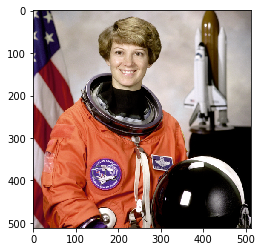

In [110]:
from skimage import data

# Show image
caller = getattr(data, 'astronaut')
img = caller()
plt.figure()
plt.imshow(img)
plt.show()

To represent it correctly for machine learning, you want to represent every sample (pixel) as just a color.

For that, you need to reshape the image that currently has a size of `width x height x 3` to a long column vector of size N x 3 where `N = width x height`. Do it and put this dataset into a matrix X

In [86]:
img


array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [111]:
shape = img.shape
shape



(512, 512, 3)

In [112]:
# Your code here
shape = img.shape
shape
img_shaped=img.reshape(shape[0]*shape[1], shape[2])
img_shaped

array([[154, 147, 151],
       [109, 103, 124],
       [ 63,  58, 102],
       ...,
       [  0,   0,   0],
       [  1,   1,   1],
       [  0,   0,   0]], dtype=uint8)

<details>
  <summary>Hint</summary>
    
```markdown
- Get the shape of image.
- Then reshape.
```

</details>
​
<details>
  <summary>View solution</summary>

```python
# Get the shape of image.
img_size = img.shape

# Reshape
X = img.reshape(img_size[0] * img_size[1], img_size[2])
```

</details>

You can now use it to fit a KMeans algorithm over the pixels, with the number of clusters being the number of colors you which to compress your image with. 

That means that if you choose let's say 64 clusters, it's gonna try to find 64 groups of similar pixels (close in colors). 

The center of each group (or clusters) is gonna be the average color of the pixels that belong to it.

So first let's try to fit a KMeans with `32` clusters (aka reducing the image to 32 colors).

In [141]:
# Your code here
model = KMeans(n_clusters=20) 
model.fit(img_shaped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<details>
  <summary>Hint</summary>
    
```markdown    
k = how many colours we want the compressed image to have.
```

</details>
​
<details>
  <summary>View solution</summary>

```python
# Fit K-means
kmeans = KMeans(n_clusters=30) # k = how many colours we want the compressed image to have.
kmeans.fit(X)
```

</details>

We've just created our compression! Why is that? Because the 64 cluster centers are now our new colors. 

Take a look at the `labels_` output of your KMean model.

In [115]:
# Your code here
model.labels_

array([1, 1, 0, ..., 0, 0, 0])


<details>
  <summary>View solution</summary>

```python
kmeans.labels_

```

</details>

As we can see, we have an assignment of every pixel to the cluster it belongs to. We can use that to find what this color is and plot our compressed image.

You can retrieve the simplified color for every pixel, which is actually the cluster center it belongs to (you can find it in `cluster_centers`). Put that in a new `image_compressed` variable and look at what the color values look like for every pixel.

In [142]:
# Your code here
image_compressed = model.cluster_centers_[model.labels_]

<details>
  <summary>Hint</summary>
    
```markdown    
Use the centroids to compress the image.
```

</details>
​
<details>
  <summary>View solution</summary>

```python
image_compressed = kmeans.cluster_centers_[kmeans.labels_]
```

</details>

the problem is that these colors are mean values that are not good to represent. We need integers between 0 and 255 to have a color that the computer can understand. You can execute the line below to transform it to manageable colors.

In [143]:
img_comp = np.clip(image_compressed.astype('uint8'), 0, 255)
img_comp

array([[155, 139, 132],
       [132, 116, 104],
       [ 90,  55, 131],
       ...,
       [  2,   1,   1],
       [  2,   1,   1],
       [  2,   1,   1]], dtype=uint8)

You can now reshape this vector into the right dimensions (the original dimension of width x height x 3)

In [144]:
# Your code here
img_comp = img_comp.reshape(shape[0] , shape[1], shape[2])

<details>
  <summary>View solution</summary>

```python
image_compressed = image_compressed.reshape(img_size[0], img_size[1], img_size[2])
```

</details>

You can now just plot this image using `imgshow`

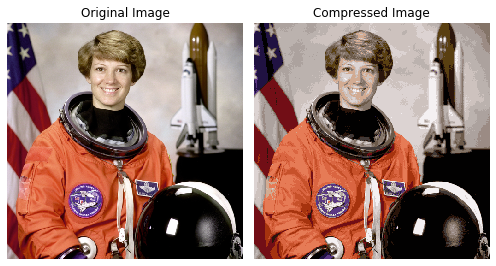

In [145]:
# Your code here
fig, ax = plt.subplots(1, 2, figsize = (7, 7))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(img_comp)
ax[1].set_title('Compressed Image')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

<details>
  <summary>Hint</summary>
    
```markdown    
Plot the original and the compressed image.
```

</details>
​
<details>
  <summary>View solution</summary>

```python
fig, ax = plt.subplots(1, 2, figsize = (7, 7))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(image_compressed)
ax[1].set_title('Compressed Image')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()
```

</details>

* Increase or decrease n_clusters = number of colours if you want to see the differences.

### (Optional) Use the elbow method

You can try to use the Elbow method to find the optimal compression that loses the less color information (very long training)

In [ ]:
# Your code here

<details>
  <summary>Hint</summary>
    
```markdown    
Apply the elbow method to find the optimal number of clusters. You need to apply your algorithm multiple times, plot a certain quantity versus $K$ (number of clusters), and find the `elbow` on your graph !
```

</details>
​
<details>
  <summary>View solution</summary>

```python
wcss = []
for i in [5, 10, 20, 30, 50, 70, 100]:
    print('working with ' + str(i) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = i, max_iter=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
```
```python
plt.plot([5, 10, 20, 30, 50, 70, 100], wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('(Within-Cluster Sums of Squares')
plt.show()
```
</details>